In [1]:
# Projeto - Detecção de Risco de Evasão Escolar (Versão com 121 atributos)

# Mantenedor original: José Ahirton Lopes (ahirtonlopes@gmail.com)
# Início do trabalho nesta versão: 21/02/2020

# Bibliotecas utilizadas (9):

import numpy as np # biblioteca para nossas operações de álgebra linear
import pandas as pd # processamento de dados e leitura/criação de arquivos .CSV (ex. pd.read_csv)
import seaborn as sns # construção de nossos plots
import matplotlib.ticker as mtick # especificação do formato de nossos eixos 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # encoder para distinção entre nossoa atributos binários e multi-classe
from sklearn.preprocessing import MinMaxScaler # pre-processamento para normalização em 0-1
from sklearn.preprocessing import StandardScaler
import plotly.offline as py # visualização via plotly
py.init_notebook_mode(connected=True) # visualização via plotly
import plotly.graph_objs as go # visualização via plotly
import plotly.graph_objs as go # visualização via plotly
import plotly.subplots as tls # visualização via plotly
import plotly.figure_factory as ff # visualização via plotly
import imblearn
from yellowbrick.classifier import DiscriminationThreshold
import csv
sns.set(style = 'white') # estilização de nossos plots em cor branca

Using TensorFlow backend.
/home/administrador/anaconda2/envs/py3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
# Input de nossos dados via arquivo .CSV, separador ',', tratamento de valores N/A

#dropout_df = pd.read_csv("dados_evasao/teste_treinamento_2018AllB.csv", sep=',', na_values=" ") # dataset treino (100.000 linhas)
#dropout_df = pd.read_csv("250000_dados_AllBimestres_2018.csv", sep=',', na_values=" ") # dataset treino (250.000 linhas)
#dropout_df = pd.read_csv("teste2_treinamento_2018AllB.csv", sep=',', na_values=" ") # dataset treino (500.000 linhas)

dropout_df = pd.read_csv("dados_evasao/dados_ml_treinamento_2018_4bimestres.csv", sep=',', na_values=" ") # dataset treino (+2.500.000 linhas)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_MATRICULA_ALUNO,CD_ALUNO,Y,CD_TURMA,CD_ESCOLA,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,900006532477,25340195,0,35499250,17735,F,14.0,2.0,14,7,3,3.14,33.7304,5.22,1092,0.0440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,1.0000,NaN,NaN,1.0,NaN,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,1.0000,1.0000,NaN,NaN,1.0000,NaN,1.0000,1.0000,NaN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,N,2.0,89.0,3.17,5.673759,3814.752809,1203.946809,0.000000,49.696629,2405.000000,98.876404,3.370787,63.044714,49.380952,95.238095,14.285714,1516.666667,100.0,100.000000,100.0,100.0,36686.0,2.0,N,4.0,263.0,3.07,7.673267,1567.311787,510.152228,0.380228,47.437262,816.015209,93.155894,12.547529,52.064638,45.604396,94.505495,15.384615,578.527472,97.338403,98.859316,97.718631,100.0,17266.0
1,900007800631,28127559,0,35768828,20357,M,12.0,1.0,14,6,3,4.17,39.7149,2.35,1221,0.0385,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,4.0,5.0,7.0,1.0,3.0,5.0,5.0,4.0,0.8214,0.9524,0.8333,0.8621,1.0000,0.9,1.0000,0.8421,0.8929,0.9

In [3]:
# Pré-processamento/limpeza de nossos dados (se houver - usando a moda Ref. https://pt.wikipedia.org/wiki/Moda_(estat%C3%ADstica))

dropout_df.fillna(dropout_df.mode(), inplace=True)

# "Dropando" CD_MATRICULA_ALUNO, CD_TURMA e CD_ESCOLA

dropout_df.drop(['CD_MATRICULA_ALUNO'],axis=1,inplace=True)
dropout_df.drop(['CD_TURMA'],axis=1,inplace=True)
dropout_df.drop(['CD_ESCOLA'],axis=1,inplace=True)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_ALUNO,Y,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,25340195,0,F,14.0,2.0,14,7,3,3.14,33.7304,5.22,1092,0.0440,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8889,1.0000,1.0000,0.8889,0.8889,1.0000,1.0000,1.0000,1.0000,0.9000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,N,2.0,89.0,3.17,5.673759,3814.752809,1203.946809,0.000000,49.696629,2405.000000,98.876404,3.370787,63.044714,49.380952,95.238095,14.285714,1516.666667,100.0,100.000000,100.0,100.0,36686.0,2.0,N,4.0,263.0,3.07,7.673267,1567.311787,510.152228,0.380228,47.437262,816.015209,93.155894,12.547529,52.064638,45.604396,94.505495,15.384615,578.527472,97.338403,98.859316,97.718631,100.0,17266.0
1,28127559,0,M,12.0,1.0,14,6,3,4.17,39.7149,2.35,1221,0.0385,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,4.0,5.0,7.0,1.0,3.0,5.0,5.0,4.0,0.8214,0.9524,0.8333,0.8621,1.0000,0.9,1.0000,0.8421,0.8929,0.9444,1.0000,0.8889,0.8000,1.0000,0.8000,0.8947,0.9259,0.9474,0.94

In [4]:
# Fazendo a divisão entre nossas amostras de evadidos/não evadidos (dropout/non-dropout), dados categóricos/numéricos/binários e multi valorados

# Separando em evasão/não evasão (dropout/non-dropout), respectivamente (Y=1/Y=0)

dropout     = dropout_df[dropout_df["Y"] == "1"]
non_dropout = dropout_df[dropout_df["Y"] == "0"]

# Separando entre colunas categóricas e numéricas

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
cat_cols   = dropout_df.nunique()[dropout_df.nunique() < 10].keys().tolist() # Se valores únicos menores que 10 = atributo categórico
cat_cols   = [x for x in cat_cols if x not in target_col] # Excetuando-se target_col
num_cols   = [x for x in dropout_df.columns if x not in cat_cols + target_col + Id_col] # Qualquer outro caso = atributo numérico

# Observando nossos atributos numéricos

#print ("Descrição de nossos atributos numéricos")

#print ("Linhas     : " ,dropout_df[num_cols].shape[0])
#print ("Colunas  : " ,dropout_df[num_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[num_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[num_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[num_cols].nunique())

#dropout_df[num_cols].head()

# Observando nossos atributos binários

bin_cols = dropout_df.nunique()[dropout_df.nunique() == 2].keys().tolist()

# Observando em detalhes nossos atributos binários (Atr ex: Y, TP_SEXO, CD_TIPO_ENSINO e NM_TIPO_ENSINO)

#print ("Descrição de nossos atributos binários")
    
#print ("Linhas     : " ,dropout_df[bin_cols].shape[0])
#print ("Colunas  : " ,dropout_df[bin_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[bin_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[bin_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[bin_cols].nunique())

dropout_df[bin_cols].head()

# Observando nossos atributos multi valorados (mais de dois valores)

multi_cols = [i for i in cat_cols if i not in bin_cols]

# Observando em detalhes nossos atributos multi valorados (mais de dois valores)

#print ("Descrição de nossos atributos multi valorados")
    
#print ("Linhas     : " ,dropout_df[multi_cols].shape[0])
#print ("Colunas  : " ,dropout_df[multi_cols].shape[1])
#print ("\nAtributos : \n" ,dropout_df[multi_cols].columns.tolist())
#print ("\nValores faltantes :  ",dropout_df[multi_cols].isnull().sum().values.sum())
#print ("\nValores únicos :  \n",dropout_df[multi_cols].nunique())

dropout_df[multi_cols].head()

# Label encoding de nossos atributos numéricos (se necessário)

le = LabelEncoder()

for i in num_cols :
    dropout_df[i] = le.fit_transform(dropout_df[i])

# Label encoding de nossos atributos binários

for j in bin_cols :
    dropout_df[j] = le.fit_transform(dropout_df[j].astype(str))
            
# Duplicando nossas colunas para atributos multi valorados (se necessário)
# Pandas get dummies - Dividindo colunas de dados com vários valores em conjuntos de
# colunas booleanas, uma nova coluna para cada valor exclusivo em cada coluna de entrada

#dropout_df[:] = np.nan_to_num(dropout_df)
#dropout_df = pd.get_dummies(data = dropout_df,columns = multi_cols )

# Normalização de nossos atributos numéricos (pode-se testar diferentes tipos de normalização)
# Dada uma entrada x, a transformaremos em (x-média) / desvio padrão (onde todas as dimensões e operações estão bem definidas)

#std = StandardScaler()
#std = MinMaxScaler()
#scaled = std.fit_transform(dropout_df[num_cols])
#scaled = pd.DataFrame(scaled,columns=num_cols)

# Descartando valores originais mesclando valores dimensionados para nossas colunas numéricas

#dropout_df_og = dropout_df.copy()
#dropout_df = dropout_df.drop(columns = num_cols,axis = 1)
#dropout_df = dropout_df.merge(scaled,left_index=True,right_index=True,how = "left")

# Verificando valores inf e/ou valores NA e alterando-os com seus valores de moda

#col_mask=evasao_train_df.isnull().any(axis=0)
#row_mask=evasao_train_df.isnull().any(axis=1)

#print (col_mask)
#print (row_mask)

dropout_df[:] = np.nan_to_num(dropout_df)

#pd.set_option('display.max_columns', None)
#dropout_df.head()

/home/administrador/anaconda2/envs/py3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [5]:
# Usaremos o dataframe no qual foram criados nossas variáveis dummy

y = dropout_df['Y'].values # Atributo alvo
X = dropout_df.drop(columns = ['Y']) # Demais atributos para classificação

# Normalização de todos os nossos atributos para um intervalo de de 0 a 1 (já feito anteriormente, contingência visando qualquer eventual erro)

#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X.columns = features

In [6]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df.head()

,CD_ALUNO,Y,TP_SEXO,VL_IDADE,VL_DISTORCAO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,25340195.0,0.0,0.0,10.0,11.0,0.0,7.0,3.0,224.0,639.0,412.0,974.0,408.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,5.0,6.0,5.0,6.0,5.0,5.0,5.0,8.0,5.0,1844.0,893.0,896.0,1848.0,522.0,410.0,374.0,2569.0,1477.0,758.0,757.0,1480.0,427.0,337.0,357.0,2181.0,1460.0,664.0,743.0,1498.0,358.0,285.0,337.0,2210.0,1845.0,910.0,791.0,1820.0,504.0,424.0,403.0,2632.0,1.0,0.0,2.0,76.0,363.0,838.0,3661.0,3559.0,0.0,2564.0,3703.0,2189.0,84.0,3332.0,1820.0,915.0,724.0,3569.0,1070.0,1481.0,580.0,388.0,472.0,2.0,0.0,4.0,262.0,4453.0,11013.0,15827.0,20481.0,171.0,27458.0,14299.0,4392.0,4104.0,15582.0,12587.0,2271.0,1487.0,15938.0,4100.0,8599.0,2829.0,1274.0,370.0
1,28127559.0,0.0,1.0,8.0,10.0,0.0,6.0,3.0,327.0,1146.0,126.0,1084.0,367.0,3.0,5.0,3.0,1.0,7.0,5.0,7.0,1.0,4.0,5.0,5.0,2.0,3.0,5.0,2.0,2.0,4.0,5.0,6.0,2.0,6.0,6.0,2.0,6.0,5.0,5.0,8.0,1.0,3.0,5.0,5.0,4.0,1446.0,839.0,702.0,1538.0,522.0,305.0,374.0,1884.0,1286.0,702.0,757.0,1277.0,272.0,337.0,214.0,1818.0,1331.0,733.0,696.0,1436.0,206060.0,293.0,337.0,109565.0,1676.0,862.0,112389.0,1527.0,504.0,336.0,403.0,1696.0,1.

In [2]:
# Gerando e lendo arquivo .csv a partir do dataframe gerado (dados de treinamento 2018 via MinMax Scaler) para eventuais necessidades de reprocessamento

#dropout_df.to_csv("dados_evasao/dados2018_minmax.csv",index=False)
dropout_df = pd.read_csv("dados_evasao/dados2018_minmaxscaler.csv", sep=',', na_values=" ") # dataset treino com normalização via MinMax Scaler (+2.500.000 linhas)

# Gerando e lendo .csv a partir do dataframe gerado (dados de treinamento 2018 via Standard Scaler) para eventuais necessidades de reprocessamento

#dropout_df.to_csv("dados_evasao/dados2018_sscaler.csv",index=False)
#dropout_df = pd.read_csv("dados_evasao/dados2018_sscaler.csv", sep=',', na_values=" ") # dataset treino com normalização via Standard Scaler (+2.500.000 linhas)

# Gerando e lendo arquivo .csv a partir do dataframe gerado (dados de treinamento 2018 sem normalização) para eventuais necessidades de reprocessamento

#dropout_df.to_csv("dados_evasao/dados2018_nonorm.csv",index=False)
#dropout_df = pd.read_csv("dados_evasao/dados2018_nonorm.csv", sep=',', na_values=" ") # dataset treino com normalização via MinMax Scaler (+2.500.000 linhas)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

#pd.set_option('display.max_columns', None)
#dropout_df.head()

In [3]:
# Definindo nossos X e y a partir do df escolhido

#y = dropout_df['Y'].values # Atributo alvo
#X = dropout_df.drop(columns = ['Y']) # Demais atributos para classificação

In [4]:
# Verificação de nossos resultados com oversampling (ex: SMOTE)

# Melhores resultados até agora: Regressão Logística, CBC e Floresta Randômica (Atualização: 10/03/2020)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
cols    = [i for i in dropout_df.columns if i not in Id_col+target_col]

smote_X = dropout_df[cols]
smote_Y = dropout_df[target_col]

# Divisão em dados de treino e teste

smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .20 ,
                                                                         random_state = 55)

In [5]:
# Oversampling da nossa classe minoritária (evadidos) usando o SMOTE

os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

0.9275090280594017
Report de classificação LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    510616
         1.0       0.15      0.92      0.26      7214

    accuracy                           0.93    517830
   macro avg       0.58      0.92      0.61    517830
weighted avg       0.99      0.93      0.95    517830


Matriz de Confusão:
[[473689  36927]
 [   611   6603]]


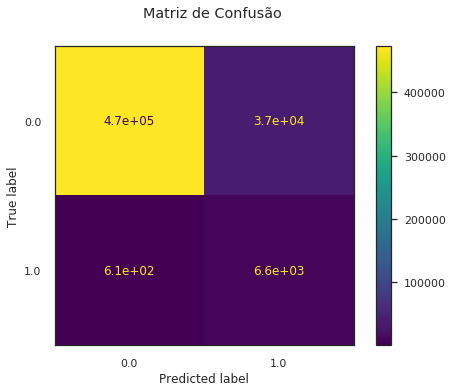

In [6]:
# Teste 1 - SMOTE + Regressão Logística

from sklearn.linear_model import LogisticRegression

model_logit_smote_minmax = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) # 92.75% de acurácia (RL + SMOTE em nossa base com normalização minmax)

result = model_logit_smote_minmax.fit(os_smote_X,os_smote_Y.values.ravel())
preds = model_logit_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [7]:
import pickle

# Usando o pickle para salvar nosso modelo SMOTE + Regressão Logístia (Teste 1) para uso posterior

filename = 'dados_evasao/logit_smote_dropout_minmax.sav'
pickle.dump(model_logit_smote_minmax, open(filename, 'wb'))

0.9417897765675994
Report de classificação RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    510616
         1.0       0.19      0.98      0.32      7214

    accuracy                           0.94    517830
   macro avg       0.59      0.96      0.64    517830
weighted avg       0.99      0.94      0.96    517830


Matriz de Confusão:
[[480644  29972]
 [   171   7043]]


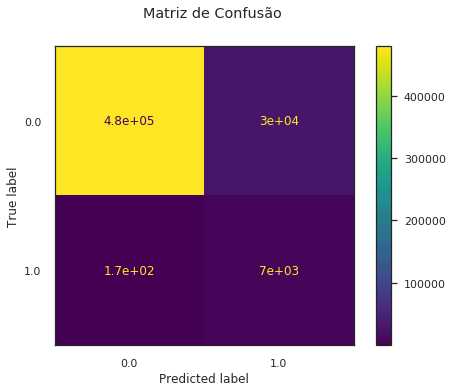

In [8]:
# Teste 2 - SMOTE + Floresta Randômica

from sklearn.ensemble import RandomForestClassifier

model_rf_smote_minmax = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30) # 95.775% de acurácia (RF + SMOTE - implementação detalhada)

result = model_rf_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_rf_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [9]:
#import pickle

# Usando o pickle para salvar nosso modelo SMOTE + Floresta Randômica (Teste 2) para uso posterior

filename = 'dados_evasao/smote_rf_dropout_minmax.sav'
pickle.dump(model_rf_smote_minmax, open(filename, 'wb'))

0.9912886468532144
Report de classificação <catboost.core.CatBoostClassifier object at 0x7f087d983490>:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    510616
         1.0       0.70      0.65      0.68      7214

    accuracy                           0.99    517830
   macro avg       0.85      0.82      0.84    517830
weighted avg       0.99      0.99      0.99    517830


Matriz de Confusão:
[[508630   1986]
 [  2525   4689]]


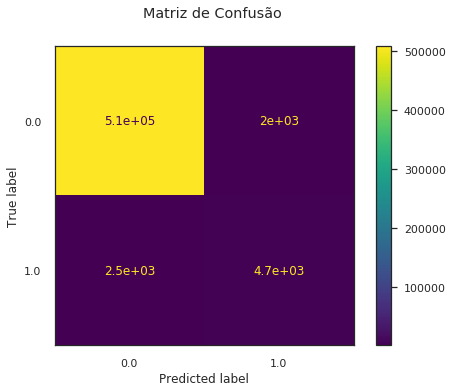

In [10]:
# Teste 3 - SMOTE + Algoritmo CatBoost Classifier

from catboost import CatBoostClassifier

model_cbc_smote_minmax = CatBoostClassifier(logging_level='Silent')

result = model_cbc_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_cbc_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [11]:
# Usando o pickle para salvar nosso modelo SMOTE + Catboost Classifier (Teste 3) para uso posterior

import pickle

filename = 'dados_evasao/cbc_smote_dropout_model_minmax.sav'
pickle.dump(model_cbc_smote_minmax, open(filename, 'wb'))

0.8268041635285711
Report de classificação GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.90    510616
         1.0       0.07      0.89      0.12      7214

    accuracy                           0.83    517830
   macro avg       0.53      0.86      0.51    517830
weighted avg       0.99      0.83      0.89    517830


Matriz de Confusão:
[[421749  88867]
 [   819   6395]]


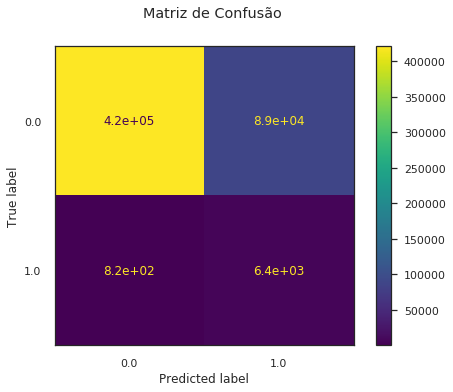

In [12]:
# Teste 4 - SMOTE + Naive Bayes

from sklearn.naive_bayes import GaussianNB

model_nb_smote_minmax = GaussianNB()

result = model_nb_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_nb_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [13]:
# Usando o pickle para salvar nosso modelo SMOTE + NB (Teste 4) para uso posterior

import pickle

filename = 'dados_evasao/smote_nb_dropout_minmax.sav'
pickle.dump(model_nb_smote_minmax, open(filename, 'wb'))

0.9764034528706332
Report de classificação MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    510616
         1.0       0.36      0.87      0.51      7214

    accuracy                           0.98    517830
   macro avg       0.68      0.92      0.75    517830
weighted avg       0.99      0.98      0.98    517830


Matriz de Confusão:
[[499344  11272]
 [   947   6267]]


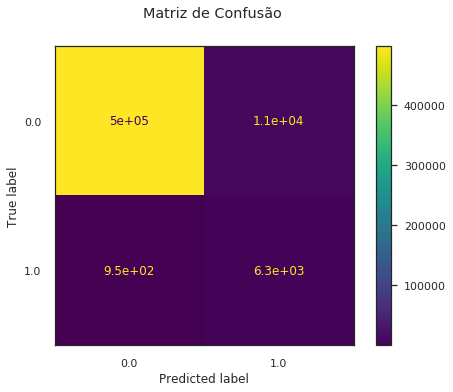

In [14]:
# Teste 5 - Algoritmo Rede Neural (MLP - Multilayer Perceptron)

from sklearn.neural_network import MLPClassifier

model_mlp_smote_minmax = MLPClassifier() 

result = model_mlp_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_mlp_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [15]:
# Usando o pickle para salvar nosso modelo SMOTE + MLP (Teste 5) para uso posterior

import pickle

filename = 'dados_evasao/smote_mlp_dropout_minmax.sav'
pickle.dump(model_mlp_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 6 - Algoritmo AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ada_smote_minmax = AdaBoostClassifier() 

result = model_ada_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_ada_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [9]:
# Usando o pickle para salvar nosso modelo SMOTE + AdaBoost (Teste 6) para uso posterior

import pickle

filename = 'dados_evasao/smote_ada_dropout_nonorm.sav'
pickle.dump(model_ada_smote_minmax, open(filename, 'wb'))

0.9920417897765677
Report de classificação XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    510616
         1.0       0.74      0.66      0.70      7214

    accuracy                           0.99    517830
   macro avg       0.87      0.83      0.85    517830
weighted avg       0.99      0.99      0.99    517830


Matr

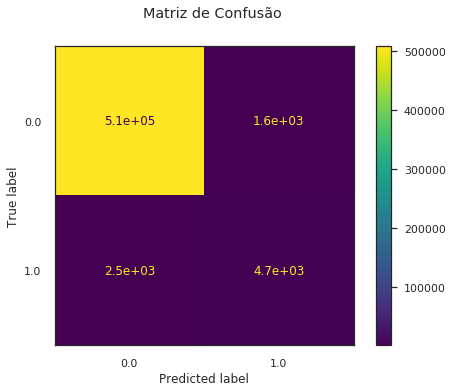

In [6]:
# Teste 7 - Algoritmo XGBoost

from xgboost import XGBClassifier

model_xgb_smote_minmax = XGBClassifier() # 

result = model_xgb_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_xgb_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [7]:
# Usando o pickle para salvar nosso modelo SMOTE + XGBoost (Teste 7) para uso posterior

import pickle

filename = 'dados_evasao/smote_xgb_dropout_nonorm.sav'
pickle.dump(model_xgb_smote_minmax, open(filename, 'wb'))

0.9892783345885715
Report de classificação ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    510616
         1.0       0.59      0.76      0.66      7214

    accuracy                           0.99    517830
   macro avg       0.79      0.88      0.83    517830
weighted avg       0.99      0.99      0.99    517830


Matriz de Confusão:
[[506784   3832]
 [  1720   5494]]


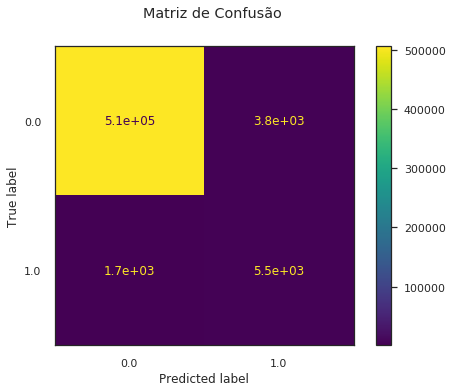

In [6]:
# Teste 8 - Algoritmo ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

model_etc_smote_minmax = ExtraTreesClassifier() # 

result = model_etc_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_etc_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [7]:
# Usando o pickle para salvar nosso modelo SMOTE + ExtraTreesClassifier (Teste 8) para uso posterior

import pickle

filename = 'dados_evasao/smote_et_dropout_minmax.sav'
pickle.dump(model_etc_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 9 - Algoritmo GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier

model_gbc_smote_minmax = GradientBoostingClassifier() # 

result = model_gbc_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_gbc_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Usando o pickle para salvar nosso modelo SMOTE + GradientBoosting (Teste 9) para uso posterior

import pickle

filename = 'dados_evasao/smote_gbc_dropout_minmax.sav'
pickle.dump(model_gbc_smote_minmax, open(filename, 'wb'))

0.9853175752660139
Report de classificação DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    510616
         1.0       0.48      0.61      0.54      7214

    accuracy                           0.99    517830
   macro avg       0.74      0.80      0.76    517830
weighted avg       0.99      0.99      0.99    517830


Matriz de Confusão:
[[505829   4787]
 [  2816   4398]]


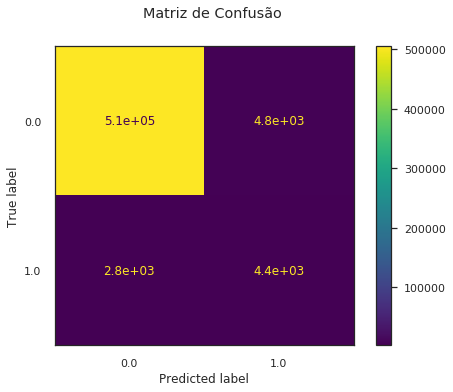

In [6]:
# Teste 10 - Algoritmo Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier

model_dt_smote_minmax = DecisionTreeClassifier() # 

result = model_dt_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_dt_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [7]:
# Usando o pickle para salvar nosso modelo SMOTE + Árvore de Decisão (Teste 11) para uso posterior

import pickle

filename = 'dados_evasao/smote_dt_dropout_nonorm.sav'
pickle.dump(model_dt_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 11 - Algoritmo SVC (SVM like)

from sklearn.svm import SVC

#model_svm_smote_minmax = SVC(kernel='linear') #

model_svc_smote_minmax = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=False, random_state=None, shrinking=True,
               tol=0.001, verbose=False) # 98.53% de acurácia (SVC - implementação detalhada)

result = model_svc_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_svc_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Usando o pickle para salvar nosso modelo SMOTE + Árvore de Decisão (Teste 12) para uso posterior

import pickle

filename = 'dados_evasao/smote_svc_dropout_model2.sav'
pickle.dump(model_svc_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 12 - Algoritmo KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn_smote_minmax = KNeighborsClassifier() 

result = model_knn_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_knn_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Usando o pickle para salvar nosso modelo SMOTE + Árvore de Decisão (Teste 13) para uso posterior

import pickle

filename = 'dados_evasao/smote_knn_dropout_model2.sav'
pickle.dump(model_knn_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 13 - Algoritmo LightGBM

import lightgbm as lgb

model_lgb_smote = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)

result = model_lgb_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_lgb_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)


In [ ]:
# Usando o pickle para salvar nosso modelo SMOTE + LightGBM (Teste 13) para uso posterior

import pickle

filename = 'dados_evasao/smote_lgb_dropout_nonorm.sav'
pickle.dump(model_lgb_smote, open(filename, 'wb'))

In [7]:
# Teste 1 - Regressão Logística

#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression() # % de acurácia (implementação convencional)

#model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#          verbose=0, warm_start=False) # 98.60% de acurácia com dataset dados2018_sscaler (implementação detalhada)

#result = model.fit(X_train, y_train)

In [8]:
#from sklearn import metrics
#prediction_test = model.predict(X_test)

# Predição quanto a acurácia para nosso algoritmo de Regressão Logística

#print (metrics.accuracy_score(y_test, prediction_test))

0.9860687870536663


In [9]:
# Matriz de confusão simples para nosso algoritmo de Regressão Logística (Teste 1)

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,prediction_test)) 

[[510616      0]
 [  7214      0]]


AxesSubplot(0.125,0.125;0.775x0.755)


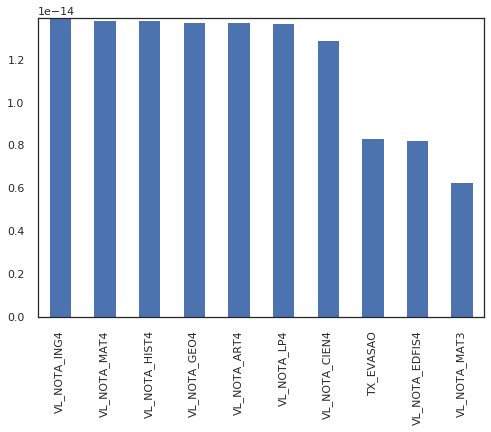

In [10]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#weights = pd.Series(model.coef_[0],
#                 index=X.columns.values)
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


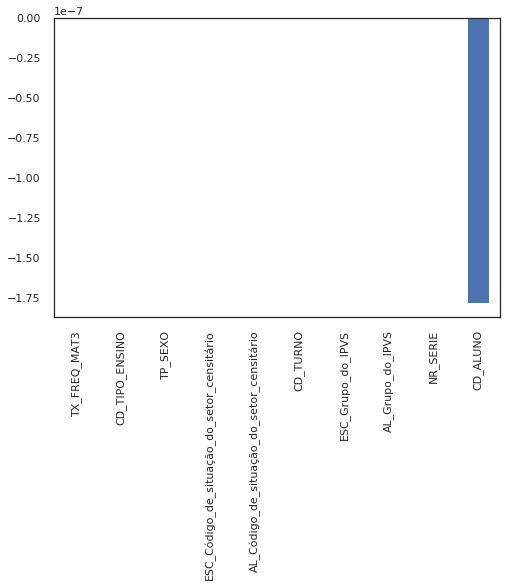

In [11]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [12]:
# Teste 2 - Random Forest Algorithm (Floresta Randômica ou Aleatória)

# Criando nossos datasets de treino e teste (já basedos em y e X)

#from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#model_rf = RandomForestClassifier() # % de acurácia (implementação convencional)

#model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
#                                  random_state =55, max_features = "auto",
#                                  max_leaf_nodes = 30) # 98.71% de acurácia com dataset dados2018_sscaler (implementação detalhada)
#model_rf.fit(X_train, y_train)

# Predição quanto a acurácia para nosso algoritmo de Floresta Randômica

#preds = model_rf.predict(X_test)
#print (metrics.accuracy_score(y_test, preds))

0.9871502230461735


In [13]:
# Matriz de confusão simples para nosso algoritmo de Floresta Randômica (Teste 2)

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

[[510472    144]
 [  6510    704]]


AxesSubplot(0.125,0.125;0.775x0.755)


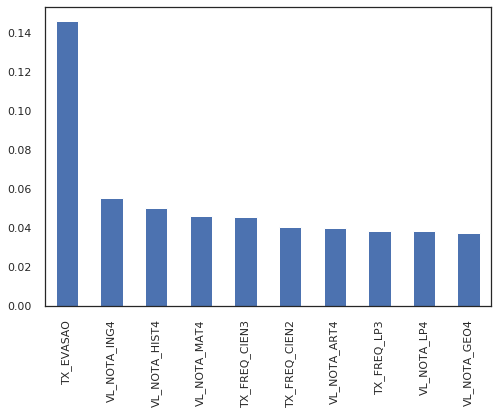

In [14]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#importances = model_rf.feature_importances_
#weights = pd.Series(importances,
#                 index=X.columns.values)

#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


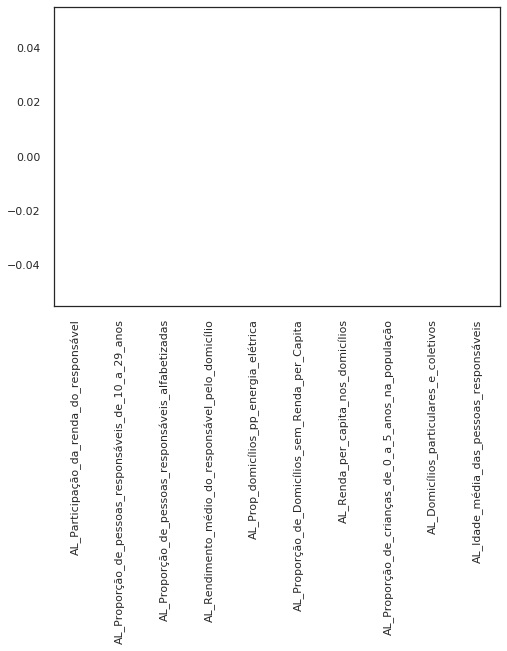

In [15]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [17]:
# Teste 3 - Algoritmo Support Vector Classifier (SVM like)

#from sklearn.svm import SVC

#model_svm = SVC(kernel='linear') # 98.61% de acurácia (implementação convencional)

#model_svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
#               max_iter=-1, probability=False, random_state=None, shrinking=True,
#               tol=0.001, verbose=False) # 98.53% de acurácia (SVC - implementação detalhada)

#model_svm.fit(X_train,y_train)
#preds = model_svm.predict(X_test)
#metrics.accuracy_score(y_test, preds)

In [18]:
# Matriz de confusão simples para nosso algoritmo SVC (Teste 3)

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

In [19]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#weights = pd.Series(model_svm.coef_[0],
#                 index=X.columns.values)
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [20]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [19]:
# Teste 4 - Algoritmo AdaBoost

#from sklearn.ensemble import AdaBoostClassifier

#model_ab = AdaBoostClassifier() # 98.91% de acurácia com dados2018_sscaler (Adaboost - implementação detalhada)
# n_estimators = 50 (default) 
# base_estimator = DecisionTreeClassifier (default)

#model_ab.fit(X_train,y_train)
#preds = model_ab.predict(X_test)
#metrics.accuracy_score(y_test, preds)

#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  

#print(confusion_matrix(y_test,preds))

0.9891026012397891
[[508755   1861]
 [  3782   3432]]


AxesSubplot(0.125,0.125;0.775x0.755)


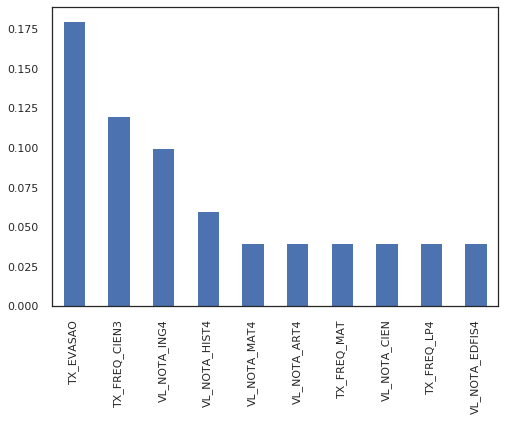

In [20]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#importances = model_ab.feature_importances_
#weights = pd.Series(importances,
#                 index=X.columns.values)

#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


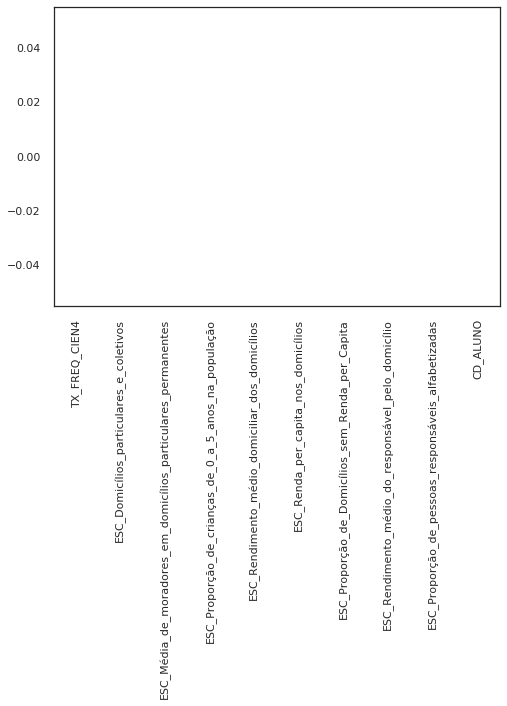

In [21]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [22]:
# Teste 5 - Algoritmo XGBoost

#from xgboost import XGBClassifier

#model_xgb = XGBClassifier() # 99.29% de acurácia com dados2018_sscaler (XGBoost - implementação simplificada)

#model_xgb.fit(X_train, y_train)
#preds = model_xgb.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

0.9929571480987969
[[509331   1285]
 [  2362   4852]]


AxesSubplot(0.125,0.125;0.775x0.755)


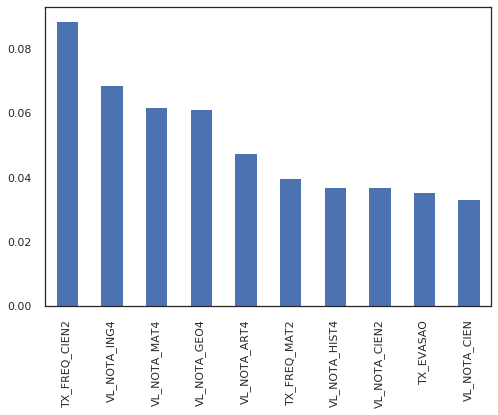

In [23]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (mais significativos)

#importances = model_xgb.feature_importances_
#weights = pd.Series(importances,
#                 index=X.columns.values)

#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


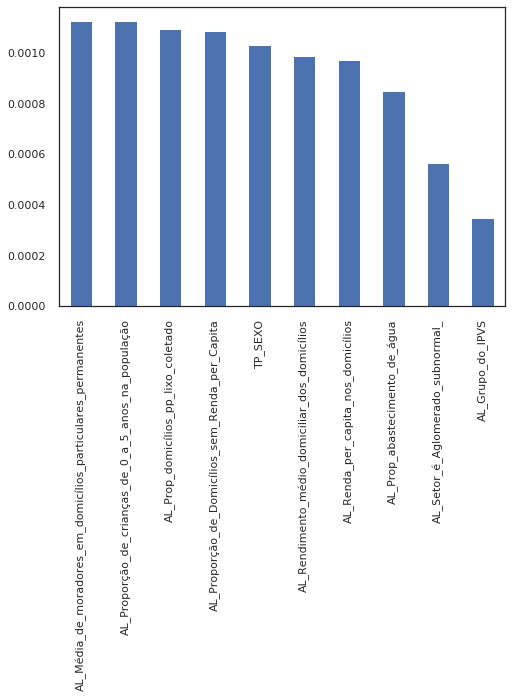

In [24]:
# Obtendo pesos/significância para os atributos neste resultado de classificação (menos significativos)

#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
# Teste 6 - Algoritmo Naive Bayes

#from sklearn.naive_bayes import GaussianNB

#model_nb = GaussianNB() # 98.57% de acurácia com dados2018_sscaler (Naive Bayes Gaussiano - implementação simplificada)

#model_nb.fit(X_train, y_train)
#preds = model_nb.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

In [16]:
# Teste 7 - Algoritmo KNN

#from sklearn import metrics
#from sklearn.neighbors import KNeighborsClassifier

#model_knn = KNeighborsClassifier() # % de acurácia com dados2018_sscaler (Alg. KNN - implementação simplificada)

#model_knn.fit(X_train, y_train)
#preds = model_knn.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

0.9859992661684337
[[510579     37]
 [  7213      1]]


In [6]:
# Teste 8 - Algoritmo ExtraTreesClassifier

#from sklearn import metrics
#from sklearn.ensemble import ExtraTreesClassifier

#model_etc = ExtraTreesClassifier() # % de acurácia com dados2018_sscaler (Alg. ETC - implementação simplificada)

#model_etc.fit(X_train, y_train)
#preds = model_etc.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

0.9900816870401483
[[510128    488]
 [  4648   2566]]


In [ ]:
# Teste 9 - Algoritmo GradientBoosting

#from sklearn.ensemble import GradientBoostingClassifier

#model_gbc = GradientBoostingClassifier() # % de acurácia com dados2018_sscaler (Alg. KNN - implementação simplificada)

#model_gbc.fit(X_train, y_train)
#preds = model_gbc.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

In [ ]:
# Teste 10 - Algoritmo LGB

#import lightgbm as lgb

#model_gbc = () # % de acurácia com dados2018_sscaler (Alg. KNN - implementação simplificada)

#model_gbc.fit(X_train, y_train)
#preds = model_gbc.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

In [28]:
# Teste 11 - Algoritmo Árvore de Decisão

#from sklearn.tree import DecisionTreeClassifier

#model_dt = DecisionTreeClassifier() # 98.84% de acurácia com dados2018_sscaler (DecisionTreeClassifier - implementação simplificada)

#model_dt.fit(X_train, y_train)
#preds = model_dt.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

0.9884865689512002
[[507549   3067]
 [  2895   4319]]


In [17]:
# Teste 12 - Algoritmo Rede Neural (MLP - Multilayer Perceptron)

#from sklearn.neural_network import MLPClassifier

#model_mlp = MLPClassifier() # % de acurácia com com dados2018_sscaler (MLPClassifier - implementação simplificada)

#model_mlp.fit(X_train, y_train)
#preds = model_mlp.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

0.9860687870536663
[[510616      0]
 [  7214      0]]


In [10]:
# Teste 13 - Algoritmo CatBoost Classifier

#from sklearn import metrics
#from catboost import CatBoostClassifier

#model_cbc = CatBoostClassifier(logging_level='Silent') # % de acurácia com dados2018_sscaler(CatBoost Classifier - implementação simplificada)

#model_cbc.fit(X_train, y_train)
#predscbc = model_cbc.predict(X_test)
#metrics.accuracy_score(y_test, predscbc)
#print(metrics.accuracy_score(y_test, predscbc))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,predscbc))

0.9930015642199177
[[509325   1291]
 [  2333   4881]]


In [21]:
# Teste 14 - Rede Neural - SGD (Implementação via Keras)

#import tensorflow as tf
#from keras.models import Sequential 
#from keras.layers import Dense 
#from keras import optimizers 
#model_nn = Sequential() 
#sgd= optimizers.SGD(lr=0.01) # (setando nossa taxa de aprendizagem)

#model_nn.add(Dense(45, activation= 'relu', input_dim=45)) 
#model_nn.add(Dense(22, activation='relu'))
#model_nn.add(Dense(11, activation='relu')) 
#model_nn.add(Dense(6, activation='relu')) 
#model_nn.add(Dense(1,activation='sigmoid'))

#model_nn.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy']) 

#model_nn = model_nn.fit(X_train, y_train, batch_size=30, epochs=50)
#preds = model_nn.predict(X_test)
#metrics.accuracy_score(y_test, preds)
#print(metrics.accuracy_score(y_test, preds))

#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Observação de nosso X_train para verificação quanto a nosso input para classificação

#pd.set_option('display.max_columns', None)
#X_train.head()

In [8]:
# Verificação de nossos resultados com oversampling (ex: SMOTE)
# Melhores resultados até agora: Regressão Logística, Floresta Randômica e SVC (Atualização: 02/03/2020)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
cols    = [i for i in dropout_df.columns if i not in Id_col+target_col]

smote_X = dropout_df[cols]
smote_Y = dropout_df[target_col]

# Divisão em dados de treino e teste

smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .20 ,
                                                                         random_state = 55)

In [5]:
# Observação de nosso smote_train_X

#pd.set_option('display.max_columns', None)
#smote_train_X.head()

,TP_SEXO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,VL_IDADE,VL_DISTORCAO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
1633160,1.0,0.0,7.0,3.0,1.0,0.0,2.0,1.0,0.0,4.0,-1.345067,-0.797698,-0.048782,-0.671734,-0.114261,1.433184,0.073564,-0.348544,-0.347734,-0.348211,-0.348492,-0.348868,-0.347526,-0.487373,-0.341161,-0.313753,-0.313633,-0.313610,-0.313434,-0.314112,-0.314280,-0.464749,-0.308115,-0.271311,-0.271249,-0.271053,-0.270320,-0.271383,-0.270883,-0.438448,-0.262671,-0.281313,-0.281053,-0.281403,-0.280094,-0.281425,-0.281600,-0.443475,-0.272355,-0.282490,-0.287352,-0.286402,-0.280168,-0.280156,-0.282441,-0.442873,-0.268990,-0.233871,-0.238099,-0.241873,-0.233816,-0.237036,-0.241152,-0.417135,-0.220771,-0.127767,-0.555857,-0.133794,-0.123331,2.294693,2.249889,-0.371771,-0.370168,-0.080270,-0.105717,1.277252,-0.088065,-0.097158,-0.102745,-0.364793,-0.004760,0.016233,0.420205,0.411965,0.240617,-0.033837,0.231126,-0.356829,0.400833,0.020943,-0.184015,0.414875,-0.389207,-0.057029,-0.137202,-0.083075,-0.826736,0.130654,-0.030576,-0.043711,0.098149,0.004337,0.132096,-0.342382,-0.272133,-0.267255,-0.262121,-0.208397,-0.035068,-0.210286,-0.086019,0.334030,0.253124,-0.284989,-0.506337,-0.532715,-0.259606,0.434396,0.06296,-0.042949,0

In [6]:
# Observação de nosso smote_test_X

#pd.set_option('display.max_columns', None)
#smote_test_X.head()

,TP_SEXO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,VL_IDADE,VL_DISTORCAO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
1983380,0.0,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,3.0,1.901894,1.189885,-0.050749,-0.755360,-0.114261,1.208837,1.353474,2.831915,2.194987,1.024987,0.424093,1.061775,4.164767,2.368829,4.141243,-0.313736,-0.313684,-0.313644,-0.313519,-0.314146,-0.314280,-0.464742,-0.308186,-0.271361,-0.271324,-0.271153,-0.270447,-0.271508,-0.270933,-0.438441,-0.262807,-0.281313,-0.281008,-0.281494,-0.280186,-0.281584,-0.281713,-0.443461,-0.272479,4.372146,2.523486,2.202510,0.528889,4.931876,4.489456,1.424103,0.212105,-0.238781,-0.241342,-0.243894,-0.239943,-0.239627,-0.241675,-0.417135,-0.224812,-0.178185,-0.556476,-0.168624,-0.174952,-0.628887,-0.636199,-0.373233,-0.377026,-0.109931,-0.147222,-0.572454,-0.151637,-0.127328,-0.143255,-0.364793,-0.129467,0.050174,0.029024,0.546917,0.090640,0.041625,-0.168452,-0.773274,0.084667,-0.512715,0.045448,-0.369124,-0.558465,-0.222450,-0.106651,0.237261,0.097740,-0.847826,-0.030576,-0.043711,0.040645,-0.010960,0.766325,-0.140279,-0.415734,-0.576173,0.090878,-1.001682,-0.853690,-0.682596,1.055464,-1.176271,-0.965044,-0.250003,0.493522,-0.554839,0.279021,0.352093,0.062960,-0.042949,-0.013164
796886

In [9]:
# Oversampling da nossa classe minoritária (evadidos) usando o SMOTE

os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

In [8]:
# Observação de nosso os_smote_X

#pd.set_option('display.max_columns', None)
#os_smote_X.head()

,TP_SEXO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,VL_IDADE,VL_DISTORCAO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,1.0,0.0,7.0,3.0,1.0,0.0,2.0,1.0,0.0,4.0,-1.345067,-0.797698,-0.048782,-0.671734,-0.114261,1.433184,0.073564,-0.348544,-0.347734,-0.348211,-0.348492,-0.348868,-0.347526,-0.487373,-0.341161,-0.313753,-0.313633,-0.313610,-0.313434,-0.314112,-0.314280,-0.464749,-0.308115,-0.271311,-0.271249,-0.271053,-0.270320,-0.271383,-0.270883,-0.438448,-0.262671,-0.281313,-0.281053,-0.281403,-0.280094,-0.281425,-0.281600,-0.443475,-0.272355,-0.282490,-0.287352,-0.286402,-0.280168,-0.280156,-0.282441,-0.442873,-0.268990,-0.233871,-0.238099,-0.241873,-0.233816,-0.237036,-0.241152,-0.417135,-0.220771,-0.127767,-0.555857,-0.133794,-0.123331,2.294693,2.249889,-0.371771,-0.370168,-0.080270,-0.105717,1.277252,-0.088065,-0.097158,-0.102745,-0.364793,-0.004760,0.016233,0.420205,0.411965,0.240617,-0.033837,0.231126,-0.356829,0.400833,0.020943,-0.184015,0.414875,-0.389207,-0.057029,-0.137202,-0.083075,-0.826736,0.130654,-0.030576,-0.043711,0.098149,0.004337,0.132096,-0.342382,-0.272133,-0.267255,-0.262121,-0.208397,-0.035068,-0.210286,-0.086019,0.334030,0.253124,-0.284989,-0.506337,-0.532715,-0.259606,0.434396,0.06296,-0.042949,0.01980

In [9]:
# Observação de nosso os_smote_Y

#pd.set_option('display.max_columns', None)
#os_smote_Y.head()

,Y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


0.9275090280594017
Report de classificação LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    510616
         1.0       0.15      0.92      0.26      7214

    accuracy                           0.93    517830
   macro avg       0.58      0.92      0.61    517830
weighted avg       0.99      0.93      0.95    517830


Matriz de Confusão:
[[473689  36927]
 [   611   6603]]


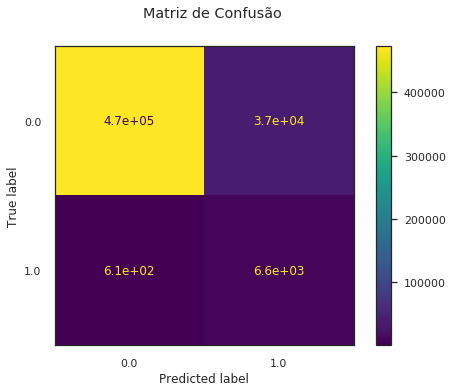

In [12]:
# Teste 15 - SMOTE + Regressão Logística

from sklearn.linear_model import LogisticRegression

model_logit_smote_minmax = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) # 94.13% de acurácia (RL + SMOTE - implementação detalhada)

result = model_logit_smote_minmax.fit(os_smote_X,os_smote_Y.values.ravel())
preds = model_logit_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [13]:
import pickle

# Usando o pickle para salvar nosso modelo SMOTE + Regressão Logístia (Teste 15) para uso posterior

filename = 'dados_evasao/logit_smote_dropout_model2.sav'
pickle.dump(model_logit_smote_minmax, open(filename, 'wb'))

0.9385261572330688
Report de classificação RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    510616
         1.0       0.18      0.99      0.31      7214

    accuracy                           0.94    517830
   macro avg       0.59      0.96      0.64    517830
weighted avg       0.99      0.94      0.96    517830


Matriz de Confusão:
[[478878  31738]
 [    95   7119]]


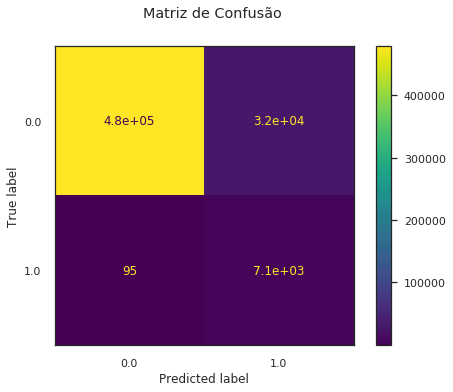

In [14]:
# Teste 16 - SMOTE + Floresta Randômica

from sklearn.ensemble import RandomForestClassifier

model_rf_smote = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30) # 95.775% de acurácia (RF + SMOTE - implementação detalhada)

result = model_rf_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_rf_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.9912886468532144
Report de classificação <catboost.core.CatBoostClassifier object at 0x7f7f900dad90>:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    510616
         1.0       0.70      0.65      0.68      7214

    accuracy                           0.99    517830
   macro avg       0.85      0.82      0.84    517830
weighted avg       0.99      0.99      0.99    517830


Matriz de Confusão:
[[508630   1986]
 [  2525   4689]]


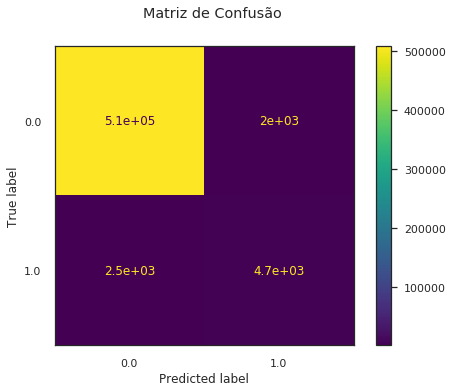

In [10]:
# Teste 17 - SMOTE + Algoritmo CatBoost Classifier

from catboost import CatBoostClassifier

model_cbc_smote_minmax = CatBoostClassifier(logging_level='Silent')

result = model_cbc_smote_minmax.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_cbc_smote_minmax.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [11]:
import pickle

# Usando o pickle para salvar nosso modelo SMOTE + Regressão Logístia (Teste 15) para uso posterior

#filename = 'dados_evasao/logit_smote_dropout_model.sav'
#pickle.dump(model_logit_smote, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE + Floresta Randômica (Teste 16) para uso posterior

#filename = 'dados_evasao/smote_rf_dropout_model.sav'
#pickle.dump(model_rf_smote, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE + Catboost Classifier (Teste 17) para uso posterior

filename = 'dados_evasao/cbc_smote_dropout_model2.sav'
pickle.dump(model_cbc_smote_minmax, open(filename, 'wb'))

In [ ]:
# Teste 18 - SMOTE + KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn_smote = KNeighborsClassifier() 

result = model_knn_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_knn_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [ ]:
# Usando o pickle para salvar nosso modelo SMOTE +  (Teste ) para uso posterior

import pickle

filename = 'dados_evasao/smote_knn_dropout_model.sav'
pickle.dump(model_knn_smote, open(filename, 'wb'))

0.8410926365795725
Report de classificação GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91    510616
         1.0       0.07      0.88      0.13      7214

    accuracy                           0.84    517830
   macro avg       0.53      0.86      0.52    517830
weighted avg       0.99      0.84      0.90    517830


Matriz de Confusão:
[[429229  81387]
 [   900   6314]]


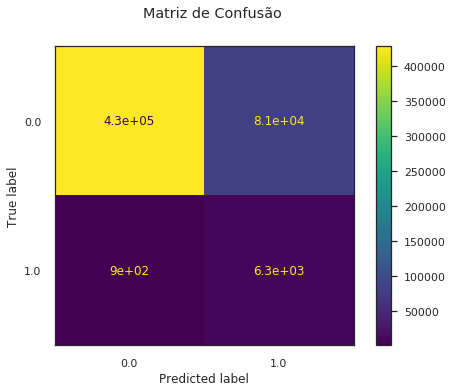

In [6]:
# Teste 19 - SMOTE + Naive Bayes

from sklearn.naive_bayes import GaussianNB

model_nb_smote = GaussianNB()

result = model_nb_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_nb_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix   

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [8]:
# Usando o pickle para salvar nosso modelo SMOTE + NB (Teste ) para uso posterior

import pickle

filename = 'dados_evasao/smote_nb_dropout_model.sav'
pickle.dump(model_nb_smote, open(filename, 'wb'))

In [ ]:
# Teste 20 - SMOTE + SVC

'''
model_svm_smote = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False) # 98.54% de acurácia ( RF + SVC - implementação detalhada)

result = model_svm_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_svm_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

0.9841782052024796
Report de classificação MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    510616
         1.0       0.46      0.78      0.58      7214

    accuracy                           0.98    517830
   macro avg       0.73      0.89      0.79    517830
weighted avg       0.99      0.98      0.99    517830


Matriz de Confusão:
[[503985   6631]
 [  1562   5652]]


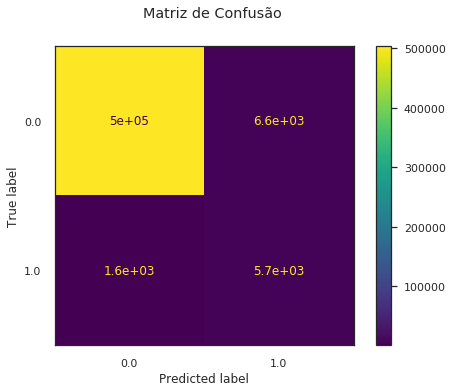

In [9]:
# Teste 21 - Algoritmo Rede Neural (MLP - Multilayer Perceptron)

from sklearn.neural_network import MLPClassifier

model_mlp_smote = MLPClassifier() 

result = model_mlp_smote.fit(os_smote_X, os_smote_Y.values.ravel())
preds = model_mlp_smote.predict(smote_test_X)
metrics.accuracy_score(smote_test_Y, preds)
print(metrics.accuracy_score(smote_test_Y, preds))

from sklearn.metrics import classification_report, confusion_matrix  

print("Report de classificação %s:\n%s\n"
      % (result, metrics.classification_report(smote_test_Y,preds)))
disp = metrics.plot_confusion_matrix(result, smote_test_X, smote_test_Y)
disp.figure_.suptitle("Matriz de Confusão")
print("Matriz de Confusão:\n%s" % disp.confusion_matrix)

In [10]:
# Usando o pickle para salvar nosso modelo SMOTE + MLP (Teste ) para uso posterior

import pickle

filename = 'dados_evasao/smote_mlp_dropout_model.sav'
pickle.dump(model_mlp_smote, open(filename, 'wb'))

In [24]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

#pd.set_option('display.max_columns', None)
#dropout_df.head()

In [ ]:
# Salvando nossos melhores modelos previamente treinados (via ´Pickle' Ref. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

import pickle

# Usando o pickle para salvar nosso modelo de Regressão Logística para uso posterior

#filename = 'dados_evasao/logit_dropout_model.sav'
#pickle.dump(model, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo de Floresta Randômica (Teste 2) para uso posterior

#filename = 'dados_evasao/rf_dropout_model.sav'
#pickle.dump(model_rf, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo de SVC (Teste 3) para uso posterior

#filename = 'dados_evasao/svc_dropout_model.sav'
#pickle.dump(model_svm, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo Naive Bayes (Teste 6)

#filename = 'dados_evasao/nb_dropout_model.sav'
#pickle.dump(model_nb, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo MLP (Teste)

#filename = 'dados_evasao/mlp_dropout_model.sav'
#pickle.dump(model_mlp, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo Cat Boost (Teste)

#filename = 'dados_evasao/cbc_dropout_model.sav'
#pickle.dump(model_cbc, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo de Rede Neural (via Keras)

#filename = 'dados_evasao/nn_dropout_model.sav'
#pickle.dump(model_nn, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE + Floresta Randômica (Teste 8) para uso posterior

#filename = 'dados_evasao/smote_rf_dropout_model.sav'
#pickle.dump(model_rf_smote, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE +  (Teste ) para uso posterior

filename = 'dados_evasao/smote_nb_dropout_model.sav'
pickle.dump(model_nb_smote, open(filename, 'wb'))

# Usando o pickle para salvar nosso modelo SMOTE +  (Teste ) para uso posterior

filename = 'dados_evasao/smote_mlp_dropout_model.sav'
pickle.dump(model_mlp_smote, open(filename, 'wb'))

In [1]:
# Abrindo modelo de Regressão Logística salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/logit_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # % de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo Floresta Randômica salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/rf_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # % de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo NB salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/nb_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # 98.73% de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo MLP salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/mlp_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # % de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo Cat Boost salvo e realizando predição com dados de teste (Ex: X_test, y_test)

filename = 'dados_evasao/cbc_dropout_model.sav'
loaded_model = pickle.load(open(filename, 'rb')) # % de acurácia
result = loaded_model.score(X_test, y_test)
print(result)

# Abrindo modelo de Rede Neural (via Keras) salvo e realizando predição com dados de teste (Ex: X_test, y_test)

#filename = 'dados_evasao/nn_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb')) # % de acurácia
#result = loaded_model.score(X_test, y_test)
#print(result)

# Abrindo modelo SVC salvo e realizando predição com dados de teste (Ex: X_test, y_test)

#filename = 'dados_evasao/svc_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb')) # 98.535% de acurácia
#result = loaded_model.score(X_test, y_test)
#print(result)

# Abrindo modelo SMOTE + Floresta Randômica salvo e realizando predição com dados de teste (Ex: smote_test_X, smote_test_Y)

#filename = 'dados_evasao/smote_rf_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(smote_test_X, smote_test_Y)
#print(result)

# Abrindo modelo SMOTE + SVC salvo e realizando predição com dados de teste (Ex: smote_test_X, smote_test_Y)

#filename = 'dados_evasao/svm_smote_dropout_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(smote_test_X, smote_test_Y)
#print(result)

NameError: name 'pickle' is not defined

In [ ]:
# Pré processamento de nossa massa de dados de testes (Ex:. dados 2019)

dropout_df2 = pd.read_csv("dados_evasao/dados_ml_teste_2019_4bimestres.csv", sep=',', na_values=" ") # dataset treino - teste completo (+2.500.000 linhas)

# Pré-processamento/limpeza de nossos dados (se houver - usando a moda Ref. https://pt.wikipedia.org/wiki/Moda_(estat%C3%ADstica))

dropout_df2.fillna(dropout_df2.mode(), inplace=True)

# "Dropando" CD_MATRICULA_ALUNO, CD_TURMA e CD_ESCOLA

dropout_df2.drop(['CD_MATRICULA_ALUNO'],axis=1,inplace=True)
dropout_df2.drop(['CD_TURMA'],axis=1,inplace=True)
dropout_df2.drop(['CD_ESCOLA'],axis=1,inplace=True)

# Fazendo a divisão entre nossas amostras de evadidos/não evadidos (dropout/non-dropout), dados categóricos/numéricos/binários e multi valorados

# Separando em evasão/não evasão ((dropout/non-dropout), respectivamente Y=1/Y=0)

dropout     = dropout_df2[dropout_df2["Y"] == "1"]
non_dropout = dropout_df2[dropout_df2["Y"] == "0"]

# Separando entre colunas categóricas e numéricas

Id_col     = ['CD_ALUNO'] # Nossa coluna de identificação CD_ALUNO
target_col = ["Y"] # Nossa coluna alvo (evasão/não evasão)
cat_cols   = dropout_df2.nunique()[dropout_df2.nunique() < 10].keys().tolist() # Se valores únicos menores que 10 = atributo categórico
cat_cols   = [x for x in cat_cols if x not in target_col] # Excetuando-se target_col
num_cols   = [x for x in dropout_df2.columns if x not in cat_cols + target_col + Id_col] # Qualquer outro caso = atributo numérico

# Observando nossos atributos numéricos

#print ("Descrição de nossos atributos numéricos")

#print ("Rows     : " ,dropout_df3[num_cols].shape[0])
#print ("Columns  : " ,dropout_df3[num_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[num_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[num_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[num_cols].nunique())

#dropout_df2[num_cols].head()

# Observando nossos atributos binários

bin_cols = dropout_df2.nunique()[dropout_df2.nunique() == 2].keys().tolist()

# Observando em detalhes nossos atributos binários (Atr ex: Y, TP_SEXO, CD_TIPO_ENSINO e NM_TIPO_ENSINO)

#print ("Descrição de nossos atributos binários")
    
#print ("Rows     : " ,dropout_df3[bin_cols].shape[0])
#print ("Columns  : " ,dropout_df3[bin_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[bin_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[bin_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[bin_cols].nunique())

#dropout_df2[bin_cols].head()

# Observando nossos atributos multi valorados (mais de dois valores)

multi_cols = [i for i in cat_cols if i not in bin_cols]

# Observando em detalhes nossos atributos multi valorados (mais de dois valores)

#print ("Descrição de nossos atributos multi valorados")
    
#print ("Rows     : " ,dropout_df3[multi_cols].shape[0])
#print ("Columns  : " ,dropout_df3[multi_cols].shape[1])
#print ("\nFeatures : \n" ,dropout_df3[multi_cols].columns.tolist())
#print ("\nMissing values :  ",dropout_df3[multi_cols].isnull().sum().values.sum())
#print ("\nUnique values :  \n",dropout_df3[multi_cols].nunique())

#dropout_df2[multi_cols].head()

# Label encoding de nossos atributos numéricos (se necessário)

le = LabelEncoder()

for i in num_cols :
    dropout_df2[i] = le.fit_transform(dropout_df2[i])

# Label encoding de nossos atributos binários

for j in bin_cols :
    dropout_df2[j] = le.fit_transform(dropout_df2[j].astype(str))
            
# Duplicando nossas colunas para atributos multi valorados
# Pandas get dummies - Dividindo colunas de dados com vários valores em conjuntos de
# colunas booleanas, uma nova coluna para cada valor exclusivo em cada coluna de entrada

#dropout_df2[:] = np.nan_to_num(dropout_df2)
#dropout_df2 = pd.get_dummies(data = dropout_df2,columns = multi_cols )

# Normalização de nossos atributos numéricos (pode-s etestar diferentes tipos de normalização)
# Dada uma entrada x, a transformaremos em (x-média) / desvio padrão (onde todas as dimensões e operações estão bem definidas)

#std = StandardScaler()
std = MinMaxScaler()
scaled = std.fit_transform(dropout_df2[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

# Descartando valores originais mesclando valores dimensionados para nossas colunas numéricas

dropout_df_og2 = dropout_df2.copy()
dropout_df2 = dropout_df2.drop(columns = num_cols,axis = 1)
dropout_df2 = dropout_df2.merge(scaled,left_index=True,right_index=True,how = "left")

# Verificando valores inf e/ou valores NA e alterando-os com seus valores de moda

#col_mask=evasao_train_df2.isnull().any(axis=0)
#row_mask=evasao_train_df2.isnull().any(axis=1)

#print (col_mask)
#print (row_mask)

dropout_df2[:] = np.nan_to_num(dropout_df2)

#pd.set_option('display.max_columns', None)
#dropout_df2.head()

# Usaremos o dataframe no qual foram criados nossas variáveis dummy

#y = dropout_df2['Y'].values # Atributo alvo
#X = dropout_df2.drop(columns = ['Y']) #Demais atributos para classificação

In [ ]:
# Normalização de todos os nossos atributos para um intervalo de de 0 a 1 (já feito anteriormente, contingência visando qualquer eventual erro)

#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X.columns = features

In [ ]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df2.head()

In [ ]:
# "Dropando" nosso atributo quanto a evasão (Y)

dropout_df2.drop(['Y'],axis=1,inplace=True)

In [ ]:
# Gerando e lendo .csv a partir do dataframe gerado (dados de teste 2019 via Standard Scaler) para eventuais necessidades de reprocessamento

dropout_df2.to_csv("dados_evasao/dados2019_minmaxscaler.csv",index=False)
#dropout_df2 = pd.read_csv("dados_evasao/dados2019_sscaler.csv", sep=',', na_values=" ") # dataset treino com normalização via Standard Scaler (+2.500.000 linhas)

# Gerando e lendo arquivo .csv a partir do dataframe gerado (dados de treinamento 2018 via MinMax Scaler) para eventuais necessidades de reprocessamento

#dropout_df.to_csv("dados_evasao/dados2018_minmaxscaler.csv",index=False)
#dropout_df = pd.read_csv("dados_evasao/dados2018_minmaxscaler.csv", sep=',', na_values=" ") # dataset treino com normalização via MinMax Scaler (+2.500.000 linhas)

# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

#pd.set_option('display.max_columns', None)
#dropout_df.head()

In [9]:
# Observação de nosso cabeçalho/primeiras 5 linhas, exibição de todas as colunas

pd.set_option('display.max_columns', None)
dropout_df2.head()

,CD_ALUNO,TP_SEXO,CD_TIPO_ENSINO,NR_SERIE,CD_TURNO,ESC_Código_de_situação_do_setor_censitário,ESC_Setor_é_Aglomerado_subnormal_,ESC_Grupo_do_IPVS,AL_Código_de_situação_do_setor_censitário,AL_Setor_é_Aglomerado_subnormal_,AL_Grupo_do_IPVS,VL_IDADE,VL_DISTORCAO,VL_IDESP,VL_REPASSE_ALUNO,VL_INSE,QT_ALUNO_ESCOLA,TX_EVASAO,VL_NOTA_LP,VL_NOTA_GEO,VL_NOTA_HIST,VL_NOTA_MAT,VL_NOTA_ING,VL_NOTA_ART,VL_NOTA_EDFIS,VL_NOTA_CIEN,VL_NOTA_LP2,VL_NOTA_GEO2,VL_NOTA_HIST2,VL_NOTA_MAT2,VL_NOTA_ING2,VL_NOTA_ART2,VL_NOTA_EDFIS2,VL_NOTA_CIEN2,VL_NOTA_LP3,VL_NOTA_GEO3,VL_NOTA_HIST3,VL_NOTA_MAT3,VL_NOTA_ING3,VL_NOTA_ART3,VL_NOTA_EDFIS3,VL_NOTA_CIEN3,VL_NOTA_LP4,VL_NOTA_GEO4,VL_NOTA_HIST4,VL_NOTA_MAT4,VL_NOTA_ING4,VL_NOTA_ART4,VL_NOTA_EDFIS4,VL_NOTA_CIEN4,TX_FREQ_LP,TX_FREQ_GEO,TX_FREQ_HIST,TX_FREQ_MAT,TX_FREQ_ING,TX_FREQ_ART,TX_FREQ_EDFIS,TX_FREQ_CIEN,TX_FREQ_LP2,TX_FREQ_GEO2,TX_FREQ_HIST2,TX_FREQ_MAT2,TX_FREQ_ING2,TX_FREQ_ART2,TX_FREQ_EDFIS2,TX_FREQ_CIEN2,TX_FREQ_LP3,TX_FREQ_GEO3,TX_FREQ_HIST3,TX_FREQ_MAT3,TX_FREQ_ING3,TX_FREQ_ART3,TX_FREQ_EDFIS3,TX_FREQ_CIEN3,TX_FREQ_LP4,TX_FREQ_GEO4,TX_FREQ_HIST4,TX_FREQ_MAT4,TX_FREQ_ING4,TX_FREQ_ART4,TX_FREQ_EDFIS4,TX_FREQ_CIEN4,ESC_Domicílios_particulares_e_coletivos,ESC_Média_de_moradores_em_domicílios_particulares_permanentes,ESC_Proporção_de_crianças_de_0_a_5_anos_na_população,ESC_Rendimento_médio_domiciliar_dos_domicílios,ESC_Renda_per_capita_nos_domicílios,ESC_Proporção_de_Domicílios_sem_Renda_per_Capita,ESC_Idade_média_das_pessoas_responsáveis,ESC_Rendimento_médio_do_responsável_pelo_domicílio,ESC_Proporção_de_pessoas_responsáveis_alfabetizadas,ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,ESC_Participação_da_renda_do_responsável,ESC_Idade_média_mulheres_respon_pelo_domicílio,ESC_Prop_mulheres_respon_domicílio_alfabet,ESC_Prop_mulheres_respon_domicílio_menos_30_anos,ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio,ESC_Prop_abastecimento_de_água,ESC_Prop_banheiro,ESC_Prop_domicílios_pp_lixo_coletado,ESC_Prop_domicílios_pp_energia_elétrica,ESC_Pop_total_residente_Mun,AL_Domicílios_particulares_e_coletivos,AL_Média_de_moradores_em_domicílios_particulares_permanentes,AL_Proporção_de_crianças_de_0_a_5_anos_na_população,AL_Rendimento_médio_domiciliar_dos_domicílios,AL_Renda_per_capita_nos_domicílios,AL_Proporção_de_Domicílios_sem_Renda_per_Capita,AL_Idade_média_das_pessoas_responsáveis,AL_Rendimento_médio_do_responsável_pelo_domicílio,AL_Proporção_de_pessoas_responsáveis_alfabetizadas,AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos,AL_Participação_da_renda_do_responsável,AL_Idade_média_mulheres_respon_pelo_domicílio,AL_Prop_mulheres_respon_domicílio_alfabet,AL_Prop_mulheres_respon_domicílio_menos_30_anos,AL_Rend_médio_mulheres_responsáveis_pelo_domicílio,AL_Prop_abastecimento_de_água,AL_Prop_banheiro,AL_Prop_domicílios_pp_lixo_coletado,AL_Prop_domicílios_pp_energia_elétrica,AL_Pop_total_residente_Mun
0,21935885.0,1.0,1.0,1.0,5.0,3.0,0.0,5.0,3.0,0.0,5.0,1.870189,3.069967,-0.313618,-0.392512,-0.074503,0.005950,0.783143,-0.368549,-0.368102,-0.368105,-0.368319,-0.368410,-0.367985,-0.499907,-0.363107,-0.337438,-0.337268,-0.337451,-0.337220,-0.337795,-0.338137,-0.477319,-0.332416,-0.292375,-0.292088,-0.292310,-0.291913,-0.292904,-0.293306,-0.448724,-0.285835,-0.295736,-0.295668,-0.296126,-0.295170,-0.295983,-0.296818,-0.450056,-0.288881,-0.582915,-0.710450,-0.710619,-0.571847,-0.785506,-0.790136,-0.927976,-0.588133,-0.507509,-0.609415,-0.608054,-0.490646,-0.684962,-0.695071,-0.833555,-0.505393,-0.465433,-0.579562,-0.574952,-0.459222,-0.657713,-0.666886,-0.800579,-0.465487,-0.462480,-0.572952,-0.568983,-0.454521,-0.647092,-0.656672,-0.791683,-0.456017,0.021628,0.283058,1.164969,-1.416278,-1.391509,1.045994,-1.289950,-1.416148,-0.923995,1.127197,-1.237270,-1.204172,-0.245674,0.672182,-1.309935,-0.810834,-1.027081,-0.033617,-0.045817,0.090044,-0.034815,0.550118,1.344588,-1.493487,-1.446986,1.771463,-1.367856,-1.540042,-0.717485,1.590083,-1.514842,-1.480729,-0.149479,0.963194,-1.444501,-0.988896,-1.327586,0

In [ ]:
# Fazendo predições com novos dados e score de probabilidade (Ref. https://machinelearningmastery.com/make-predictions-scikit-learn/)

import pickle

# Importando modelo salvo Regressão Logística

logit_filename = 'dados_evasao/logit_dropout_model.sav'
logit_loaded_model = pickle.load(open(logit_filename, 'rb'))

# Importando modelo salvo Random Forest

#rf_filename = 'dados_evasao/rf_dropout_model.sav'
#rf_loaded_model = pickle.load(open(rf_filename, 'rb'))

# Importando modelo salvo NB

#nb_filename = 'dados_evasao/nb_dropout_model.sav'
#nb_loaded_model = pickle.load(open(nb_filename, 'rb'))

# Importando modelo salvo MLP

#mlp_filename = 'dados_evasao/mlp_dropout_model.sav'
#mlp_loaded_model = pickle.load(open(mlp_filename, 'rb'))

# Importando modelo salvo Cat Boost

#cbc_filename = 'dados_evasao/cbc_dropout_model.sav'
#cbc_loaded_model = pickle.load(open(cbc_filename, 'rb'))

# Importando modelo salvo SVC

#svm_filename = 'dados_evasao/svc_dropout_model.sav'
#svm_loaded_model = pickle.load(open(svm_filename, 'rb'))

# Expondo features usadas no treinamento/teste

features = ['TP_SEXO','CD_TIPO_ENSINO','NR_SERIE','CD_TURNO','ESC_Código_de_situação_do_setor_censitário','ESC_Setor_é_Aglomerado_subnormal_','ESC_Grupo_do_IPVS','AL_Código_de_situação_do_setor_censitário','AL_Setor_é_Aglomerado_subnormal_','AL_Grupo_do_IPVS','VL_IDADE','VL_DISTORCAO','VL_IDESP','VL_REPASSE_ALUNO','VL_INSE','QT_ALUNO_ESCOLA','TX_EVASAO','VL_NOTA_LP','VL_NOTA_GEO','VL_NOTA_HIST','VL_NOTA_MAT','VL_NOTA_ING','VL_NOTA_ART','VL_NOTA_EDFIS','VL_NOTA_CIEN','VL_NOTA_LP2','VL_NOTA_GEO2','VL_NOTA_HIST2','VL_NOTA_MAT2','VL_NOTA_ING2','VL_NOTA_ART2','VL_NOTA_EDFIS2','VL_NOTA_CIEN2','VL_NOTA_LP3','VL_NOTA_GEO3','VL_NOTA_HIST3','VL_NOTA_MAT3','VL_NOTA_ING3','VL_NOTA_ART3','VL_NOTA_EDFIS3','VL_NOTA_CIEN3','VL_NOTA_LP4','VL_NOTA_GEO4','VL_NOTA_HIST4','VL_NOTA_MAT4','VL_NOTA_ING4','VL_NOTA_ART4','VL_NOTA_EDFIS4','VL_NOTA_CIEN4','TX_FREQ_LP','TX_FREQ_GEO','TX_FREQ_HIST','TX_FREQ_MAT','TX_FREQ_ING','TX_FREQ_ART','TX_FREQ_EDFIS','TX_FREQ_CIEN','TX_FREQ_LP2','TX_FREQ_GEO2','TX_FREQ_HIST2','TX_FREQ_MAT2','TX_FREQ_ING2','TX_FREQ_ART2','TX_FREQ_EDFIS2','TX_FREQ_CIEN2','TX_FREQ_LP3','TX_FREQ_GEO3','TX_FREQ_HIST3','TX_FREQ_MAT3','TX_FREQ_ING3','TX_FREQ_ART3','TX_FREQ_EDFIS3','TX_FREQ_CIEN3','TX_FREQ_LP4','TX_FREQ_GEO4','TX_FREQ_HIST4','TX_FREQ_MAT4','TX_FREQ_ING4','TX_FREQ_ART4','TX_FREQ_EDFIS4','TX_FREQ_CIEN4','ESC_Domicílios_particulares_e_coletivos','ESC_Média_de_moradores_em_domicílios_particulares_permanentes','ESC_Proporção_de_crianças_de_0_a_5_anos_na_população','ESC_Rendimento_médio_domiciliar_dos_domicílios','ESC_Renda_per_capita_nos_domicílios','ESC_Proporção_de_Domicílios_sem_Renda_per_Capita','ESC_Idade_média_das_pessoas_responsáveis','ESC_Rendimento_médio_do_responsável_pelo_domicílio','ESC_Proporção_de_pessoas_responsáveis_alfabetizadas','ESC_Proporção_de_pessoas_responsáveis_de_10_a_29_anos','ESC_Participação_da_renda_do_responsável','ESC_Idade_média_mulheres_respon_pelo_domicílio','ESC_Prop_mulheres_respon_domicílio_alfabet','ESC_Prop_mulheres_respon_domicílio_menos_30_anos','ESC_Rend_médio_mulheres_responsáveis_pelo_domicílio','ESC_Prop_abastecimento_de_água','ESC_Prop_banheiro','ESC_Prop_domicílios_pp_lixo_coletado','ESC_Prop_domicílios_pp_energia_elétrica','ESC_Pop_total_residente_Mun','AL_Domicílios_particulares_e_coletivos','AL_Média_de_moradores_em_domicílios_particulares_permanentes','AL_Proporção_de_crianças_de_0_a_5_anos_na_população','AL_Rendimento_médio_domiciliar_dos_domicílios','AL_Renda_per_capita_nos_domicílios','AL_Proporção_de_Domicílios_sem_Renda_per_Capita','AL_Idade_média_das_pessoas_responsáveis','AL_Rendimento_médio_do_responsável_pelo_domicílio','AL_Proporção_de_pessoas_responsáveis_alfabetizadas','AL_Proporção_de_pessoas_responsáveis_de_10_a_29_anos','AL_Participação_da_renda_do_responsável','AL_Idade_média_mulheres_respon_pelo_domicílio','AL_Prop_mulheres_respon_domicílio_alfabet','AL_Prop_mulheres_respon_domicílio_menos_30_anos','AL_Rend_médio_mulheres_responsáveis_pelo_domicílio','AL_Prop_abastecimento_de_água','AL_Prop_banheiro','AL_Prop_domicílios_pp_lixo_coletado','AL_Prop_domicílios_pp_energia_elétrica','AL_Pop_total_residente_Mun']

# Pred/Prob com base em nosso modelo salvo Floresta Randômica

#dropout_pred = logit_loaded_model.predict(dropout_df2[features])
dropout_prob = model_gbc.predict_proba(dropout_df2[features])[:, 1]

# Pred/Prob com base em nosso modelo salvo SVC

#dropout_pred = svm_loaded_model.predict(dropout_df2[features])
#dropout_prob = svm_loaded_model.predict_proba(dropout_df2[features])[:, 1]

#dropout_dataframe = pd.DataFrame({'CD_ALUNO': dropout_df2['CD_ALUNO'],'Risco de Evasão':dropout_pred})
dropout_dataframe = pd.DataFrame({'CD_ALUNO': dropout_df2['CD_ALUNO'],'Risco de Evasão':dropout_prob})

# Gerando lista quanto a risco de evasão para os alunos do dataset de teste

dropout_dataframe.to_csv("dados_evasao/risco_evasao_smote_logit.csv",index=False)
#dropout_dataframe.to_csv("dados_evasao/risco_evasao_gb.csv",index=False)